In [1]:
pip install fbprophet

In [13]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv(r'/content/siniestros_con_hipotesis.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15,17) have mixed types.Specify dtype option on import or set low_memory=False.



In [19]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,Unnamed: 0,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,lon,lat,CODIGO_CAUSA,DESCRIPCION,CODIGO_CAUSA2,DESCRIPCION2,CODIGO_CAUSA3,DESCRIPCION3,CODIGO_CAUSA4,DESCRIPCION4,Hora,Dia,Mes,ILESOS
0,0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion,-74.103029,4.684126,112,DESOBEDECER SEÑALES,NaN,NaN,NaN,NaN,NaN,NaN,9,3,1,0.0
1,1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via,-74.115143,4.751302,139,IMPERICIA EN EL MANEJO,115,EMBRIAGUEZ O DROGA,NaN,NaN,NaN,NaN,13,3,1,3.0
2,2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via,-74.143167,4.561811,157,OTRA,NaN,NaN,NaN,NaN,NaN,NaN,7,3,1,0.0
3,3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via,-74.064536,4.630415,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN,NaN,NaN,NaN,NaN,20,3,1,2.0
4,4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via,-74.145729,4.539118,127,TRANSITAR EN CONTRAVIA,104,ADELANTAR INVADIENDO VIA,NaN,NaN,NaN,NaN,12,3,1,2.0


In [20]:
df = pd.DataFrame(df.groupby('FECHA')['CODIGO_SINIESTRO'].count().reset_index(name='Cantidad_siniestros'))

In [21]:
df = df.sort_values(by=['FECHA'])

In [22]:
df = df.rename(columns = {'FECHA': 'ds',
                                'Cantidad_siniestros': 'y'})
df.tail()

,ds,y
1821,2019-12-27,83
1822,2019-12-28,63
1823,2019-12-29,50
1824,2019-12-30,79
1825,2019-12-31,63


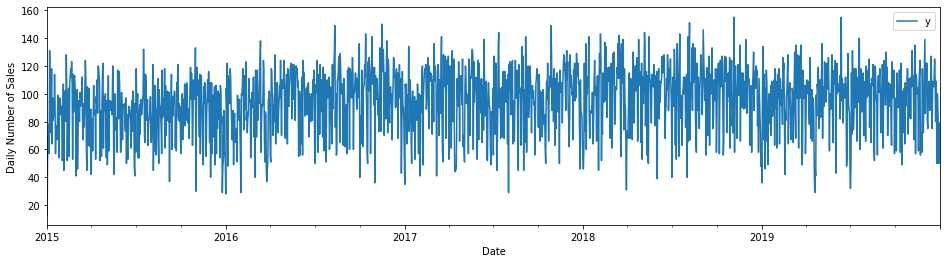

In [23]:
ax = df.set_index('ds').plot(figsize = (16, 4))
ax.set_ylabel('Daily Number of Accidents')
ax.set_xlabel('Date')
plt.show()

In [25]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1857,2022-08-01
1858,2022-09-01
1859,2022-10-01
1860,2022-11-01
1861,2022-12-01


In [27]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1857,2022-08-01,86.011912,41.691433,124.263129
1858,2022-09-01,92.460537,53.843498,128.245405
1859,2022-10-01,88.359836,47.993003,130.243576
1860,2022-11-01,96.578245,58.237839,136.498529
1861,2022-12-01,94.429241,51.137800,135.452546


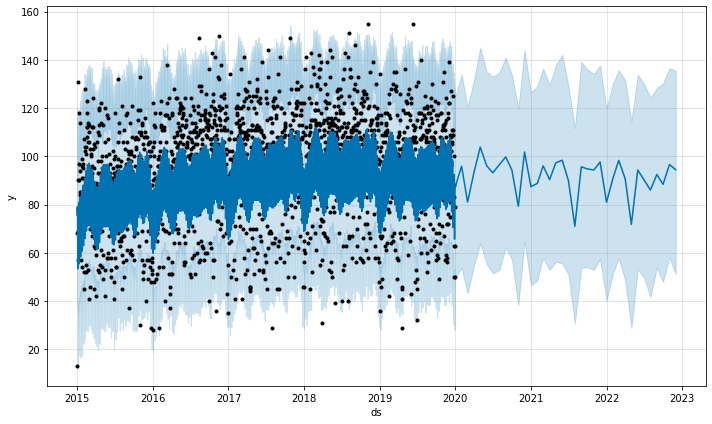

<Figure size 720x576 with 0 Axes>

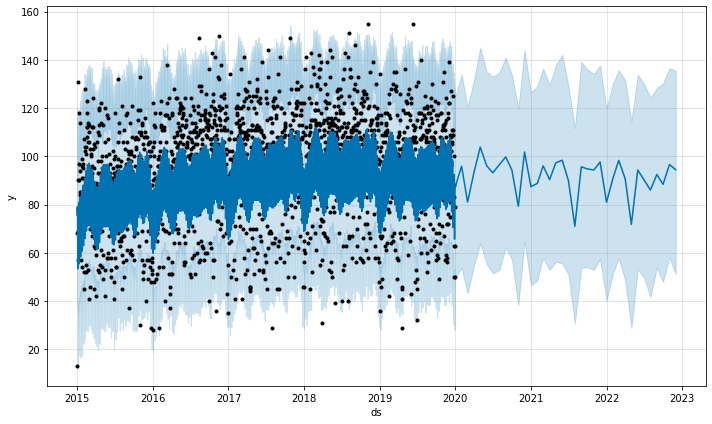

In [32]:
plt.figure(figsize=(10,8))
my_model.plot(forecast,
              uncertainty=True)

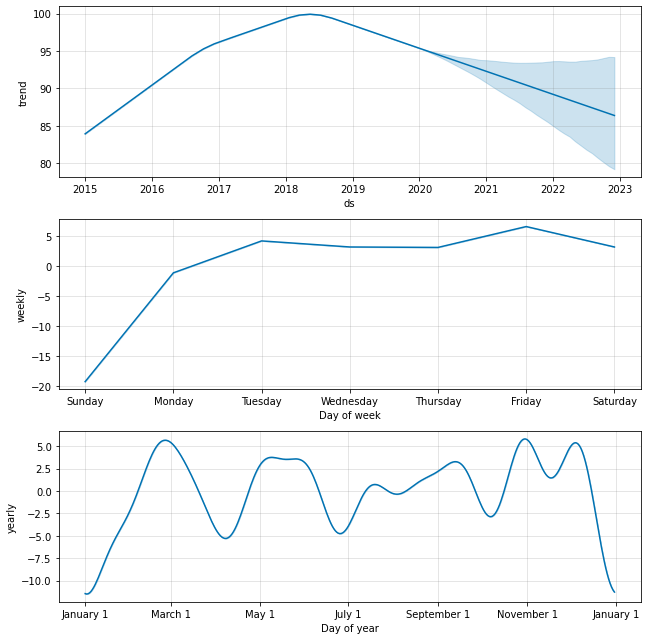

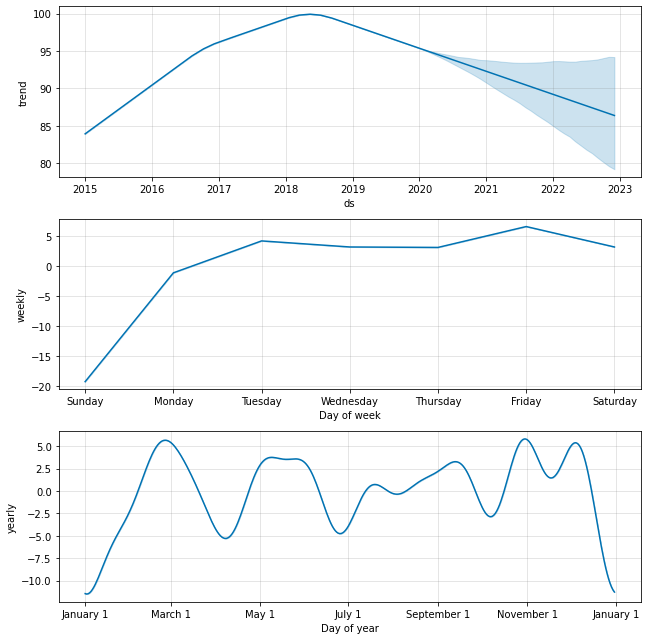

In [29]:
my_model.plot_components(forecast)

In [30]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()


INFO:fbprophet:Making 5 forecasts with cutoffs between 2017-01-10 00:00:00 and 2018-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-01-11,99.766071,59.772709,139.006641,99,2017-01-10
1,2017-01-12,101.126854,62.179207,136.287298,110,2017-01-10
2,2017-01-13,103.776039,66.323937,145.544571,94,2017-01-10
3,2017-01-14,101.307624,61.564591,139.625769,65,2017-01-10
4,2017-01-15,80.749280,45.330689,116.269447,50,2017-01-10


In [31]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,511.017557,22.605697,17.140460,0.223484,0.122945,0.907692
1,38 days,497.643979,22.307935,16.904418,0.218727,0.121565,0.912088
2,39 days,480.607700,21.922767,16.402948,0.214753,0.119563,0.915385
3,40 days,481.017697,21.932116,16.476060,0.214301,0.120525,0.917582
4,41 days,473.667923,21.763913,16.319406,0.210414,0.120525,0.917582
